<hr/>

<b>Notebook Summary</b>

These notes are based on Prof. Norman Wildberger's lectures on Dynamics on Graphs which can be found <a href="https://www.youtube.com/c/WildEggmathematicscourses/featured">here</a>. 
    
They notes are are being hosted at my website <a href="https://www.ladatavita.com/">ladatavita.com</a> and the Jupyter notebook is also available from my Github repo at: <a href="https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks">https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks</a>

The purpose of this notebook is a continuation where we left off in the previous notebook ES1_2, which introduced some basic properties of graphs and provided some initial examples and proofs that demonstrate these properties. 

This notebook will continue the investigation, but will start to add some more structure to it, and seek to to ascertain certain criteria in graph structure that must be met for the count of root populations to be finite. Also in this notebook, I have taken the opportunity to clean up some of the functions I am using to create graphs and manage mutation. Also, I have also stopped using the visnetwork package in favour of networkx/matplotlib just for the sake of simplifying formatting.  

<hr/>

In [49]:
import pyvis.network as nt
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import networkx as nx
import string
import random

<hr/>
<b>Aim</b>: Create some functions to allow the continued investigation structure in simple graphs
<hr/>

<b>Observe</b>: Recall from the previous notebook that successively applying the $ps_x$ mutation function would sometimes lead to a finite set of root populations and these cases appear to be related to certain graph types. In particular, some instances of $A_n$ and $D_6$ were used to test this.   

<b>Observe</b>: It is possible to put more rigor by looking at those instances which will definitely not lead to finite sets. 

<b>Let</b> $F1, F2$ and $F3$ be functions to create graphs given connections of edges, carry out the $ps_x$ function, and test this function over a chosen amoont of iterations

In [314]:
def F1(edges=None):
    
    verticeLabels = list(set([item for sublist in edges for item in sublist]))
    randomNumberToIntialiseSingletonPopulation = random.randint(0, len(verticeLabels) - 1)

    vertices = [(verticeLabels[i], {"population": 0}) for i in range(len(verticeLabels))]
    graph = nx.Graph()
    graph.add_nodes_from(vertices)
    graph.add_edges_from(edges)
    
    graph.nodes[verticeLabels[randomNumberToIntialiseSingletonPopulation]]['population'] = 1
    
    return(graph)

def F2(graph = None, nodeChoice = None, printSummary = True, 
       returnUpdatedGraph = False, 
       returnListOfPopulations = False,
      returnAllAsDict = False):
   
    edgesOfChosenNode = list(nx.edges(graph, [nodeChoice]))
   
    neigborOfChosenNode = [edgesOfChosenNode[i][1] for i in range(len(list(edgesOfChosenNode)))]
    nodeChoicePopulation = graph.nodes[nodeChoice]['population']
    sumOfNeighborsOfChosenNode = np.sum([graph.nodes[i]['population'] for i in neigborOfChosenNode])
    populationOfNode = -nodeChoicePopulation + sumOfNeighborsOfChosenNode
    updatedGraph = graph.copy()
    updatedGraph.nodes[nodeChoice]['population'] = populationOfNode

    newPopulations = [updatedGraph.nodes[i]['population'] for i in list(updatedGraph)]
    if printSummary:
        print("Node choice", 
              nodeChoice,
              "\nNode details",
              nx.nodes(graph)[nodeChoice],
              "\nChange in node population ",
              nx.nodes(graph)[nodeChoice]['population'], 
              "->", 
              populationOfNode)
        print("Updated node populations of graph: ", newPopulations, "\n")

    if returnUpdatedGraph: 
        return(updatedGraph)
    
    if returnListOfPopulations:
        return(np.array(newPopulations))
    
    if returnAllAsDict:
        return({"graph": updatedGraph,
               "population": np.array(newPopulations)})
    
def F3(graphChoice=None, vertices = [], iterations=5, returnPopulations = True, iterateThroughAllVertices = True):
    listOfAllPopulations = []
    graph = graphChoice
    
    if iterateThroughAllVertices:
        vertices = graph.nodes
    
    for i in range(iterations):
        for j in vertices:
            udpatedGraphAndPopulation = F2(graph, j, returnAllAsDict=True, printSummary = False)
            graph = udpatedGraphAndPopulation['graph']
            population = udpatedGraphAndPopulation['population']
            listOfAllPopulations.append(population)
            
    print("Number of unique populations: ", len(list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))))
    if returnPopulations:
        setOfAllPopulations = list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))
        return({"iterations":iterations,
               "populationAsSetCount":len(setOfAllPopulations),
                "populationAsListCount":len(listOfAllPopulations),
               "populationsAsSet": setOfAllPopulations,
               "populationsAsList": listOfAllPopulations})

<b>Let</b> $F4$ be an example of a graph created with the $F1$ function

In [319]:
F4 = F1(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f")] )

<b>Let</b> $F5$ be an example of a function that applies the $ps_x$ mutation to a given graph and vertice.

In [316]:
F5 = F2(graph=F4, nodeChoice='a')

Node choice a 
Node details {'population': 0} 
Change in node population  0 -> 0
Updated node populations of graph:  [0, 0, 0, 1, 0, 0] 



<b>Let</b> $F6$ be an example of a function that applies the $ps_x$ mutation to a chosen set of nodes over  chosen set of iterations. 

In [321]:
F6 = F3(graphChoice=F4, iterations=10, returnPopulations=True)

Number of unique populations:  22


<hr/>

<b>Aim</b>: Use the functions to ascertain situations where all the count of possible roots of a graph, denoted $R(X)$ will not be finite

<hr/>

<b>Strategy</b>: Assume that $X$ is a Simple Graph with a finite root population and deduce what characteristics it can not have

<b>Observe</b>: If the graph is cyclical (i.e. ) then it is not possible 

<b>Observe</b>: Recall the Simple Graph $A_n$ and note that it differs to to $A_n \text{~}$ only in the manner that one more edge gets created. 

<b>Let</b>: $F7$ and $F8$ be examples of an  $A_n$ and  $A_n \text{~}$ graph

In [381]:
F7 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e")] )
F8 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e"), ("e","a")] )

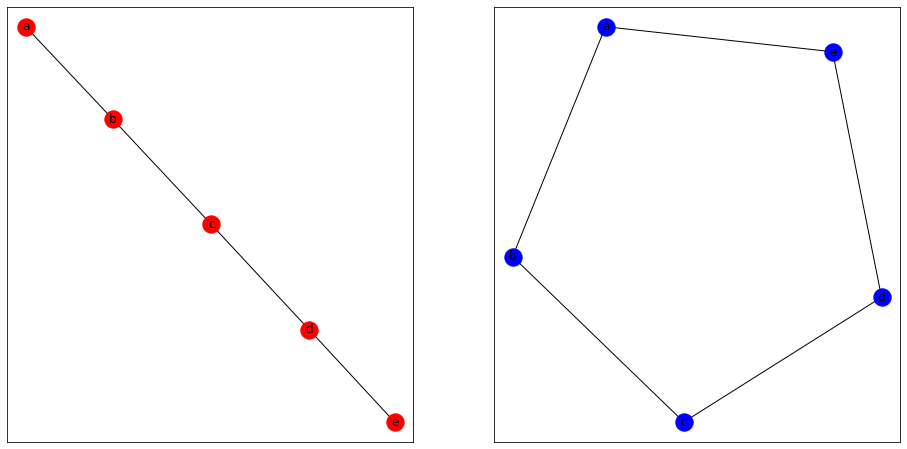

In [375]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos1 = nx.spring_layout(F7)
pos2 = nx.spring_layout(F8)

nx.draw_networkx(F7, pos1, ax=ax1, node_color='r')
nx.draw_networkx(F8, pos2, ax=ax2, node_color='b')

<b>Observe</b>: that this change (in which a single edge is added to an existing graph) makes it impossible for the root populations to be finite. 

<b>Let</b> $F9$ and $F10$ be the number of root populations after 100 iterations of $F7$ and $F8$. 

In [380]:
F9 = F3(graphChoice=F7, iterations=5, returnPopulations=True)
F10 = F3(graphChoice=F8, iterations=100, returnPopulations=True)

Number of unique populations:  16
Number of unique populations:  334


<b>Observe</b>: After 6 iterations, the number of of root populations reaches 18 for $F7$ and appears not to go any higher. In contrast, $F10$ appears to keep on increasing

In [354]:
[print(i) for i in F8['populationsAsList']][0]

[0 0 1 0 0]
[0 0 1 0 0]
[ 0  0 -1  0  0]
[ 0  0 -1 -1  0]
[ 0  0 -1 -1 -1]
[-1  0 -1 -1 -1]
[-1 -2 -1 -1 -1]
[-1 -2 -1 -1 -1]
[-1 -2 -1 -1 -1]
[-1 -2 -1 -1 -2]
[-2 -2 -1 -1 -2]
[-2 -2 -1 -1 -2]
[-2 -2 -2 -1 -2]
[-2 -2 -2 -3 -2]
[-2 -2 -2 -3 -2]
[-3 -2 -2 -3 -2]
[-3 -3 -2 -3 -2]
[-3 -3 -3 -3 -2]
[-3 -3 -3 -3 -2]
[-3 -3 -3 -3 -4]
[-3 -3 -3 -3 -4]
[-3 -4 -3 -3 -4]
[-3 -4 -4 -3 -4]
[-3 -4 -4 -4 -4]
[-3 -4 -4 -4 -4]
[-5 -4 -4 -4 -4]
[-5 -5 -4 -4 -4]
[-5 -5 -4 -4 -4]
[-5 -5 -4 -5 -4]
[-5 -5 -4 -5 -5]
[-5 -5 -4 -5 -5]
[-5 -5 -4 -5 -5]
[-5 -5 -6 -5 -5]
[-5 -5 -6 -6 -5]
[-5 -5 -6 -6 -6]
[-6 -5 -6 -6 -6]
[-6 -7 -6 -6 -6]
[-6 -7 -6 -6 -6]
[-6 -7 -6 -6 -6]
[-6 -7 -6 -6 -7]
[-7 -7 -6 -6 -7]
[-7 -7 -6 -6 -7]
[-7 -7 -7 -6 -7]
[-7 -7 -7 -8 -7]
[-7 -7 -7 -8 -7]
[-8 -7 -7 -8 -7]
[-8 -8 -7 -8 -7]
[-8 -8 -8 -8 -7]
[-8 -8 -8 -8 -7]
[-8 -8 -8 -8 -9]
